In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import rc
from matplotlib import animation
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib as mpl

import re
import os
import glob
import datetime
%matplotlib inline

In [2]:
rc('font', size=8)
rc('font', family='Arial')
rc('axes', linewidth=1)
rc('xtick.major', width=0.5, size=1.5)
rc('ytick.major', width=0.5, size=1.5)

In [3]:
colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']
colors.reverse()

# Figure 5

In [4]:
from matplotlib.font_manager import FontProperties
font0 = FontProperties()

In [5]:
def load_outputs(exp_names):
    
    output_df = pd.DataFrame()
    output_df = pd.DataFrame(columns=['RT','XS','T','NA','MA','BA','TA'])
    
    for exp_name in exp_names:
        path = os.path.join('../optimisations/', exp_name, 'reactor_output', exp_name.replace('_', '')+'.outputs.*.txt')
        files = sorted(glob.glob(path))
        
        for file in files:
            output = np.loadtxt(file)
                    
            try:
                df = pd.DataFrame(output, columns=['RT','XS','T','NA','MA','BA','TA'])
            except:
                df = pd.DataFrame(data=[output],
                                  columns=['RT','XS','T','NA','MA','BA','TA'])

            df['exp_name'] = exp_name
            output_df = output_df.append(df,ignore_index=True)
    
    return output_df

In [6]:
run2 = pd.read_csv('../optimisations/run_II/runII.results.csv')
run1 = pd.read_csv('../optimisations/run_I/runI.results.csv')

In [7]:
exp_names = ['run_I']
run1_outputs = load_outputs(exp_names)
exp_names = ['run_II']
run2_outputs = load_outputs(exp_names)

run2_outputs['maba'] = run2_outputs.MA / run2_outputs.BA
run1_outputs['maba'] = run1_outputs.MA / run1_outputs.BA

In [13]:
run1_outputs

,RT,XS,T,NA,MA,BA,TA,exp_name,maba
0,4.315671,5.687259,141.15,0.000000,0.123069,0.493082,0.383849,run_I,0.249591
1,11.844810,1.867496,134.75,0.032046,0.700855,0.232875,0.034224,run_I,3.009571
2,4.050255,1.653568,115.85,0.144684,0.763265,0.085645,0.006406,run_I,8.911933
3,23.689620,2.360333,147.50,0.011557,0.587944,0.327834,0.072665,run_I,1.793423
4,8.575149,2.119454,101.70,0.160928,0.762194,0.072458,0.004420,run_I,10.519130
...,...,...,...,...,...,...,...,...,...
95,5.243403,1.500000,114.65,0.131562,0.773536,0.089832,0.005070,run_I,8.610913
96,14.132434,4.340946,105.70,0.008967,0.586605,0.346885,0.057543,run_I,1.691064
97,5.302507,3.105834,112.85,0.039111,0.737025,0.202448,0.021416,run_I,3.640568
98,4.168174,1.920722,104.70,0.245045,0.704282,0.047643,0.003030,run_I,14.782543


In [8]:
def make_bars(y, bottom):
    x = list(range(1, len(y)+1))
    x_new = x + x
    
    y_new = [(y + y)[i] for i in np.argsort(x_new)]
    
    if isinstance(bottom, list):
        bottom = [(bottom + bottom)[i] for i in np.argsort(x_new)]
        
    y_new = np.array(y_new) + bottom
    
    return np.sort(x_new)[1:], y_new[:-1], bottom[:-1]

In [9]:
def plot_bars(ax, y, bottom, color, alpha=1):
    x_bar, y_bar, y_bottom = make_bars(y, bottom)
    ax.fill_between(x_bar, y_bottom, y_bar, facecolor=color, edgecolor='none', alpha=alpha)
    ax.plot(x_bar, y_bar, color=color, lw=0.5)
    
    return ax

Text(0.92, 0.216, '(c)')

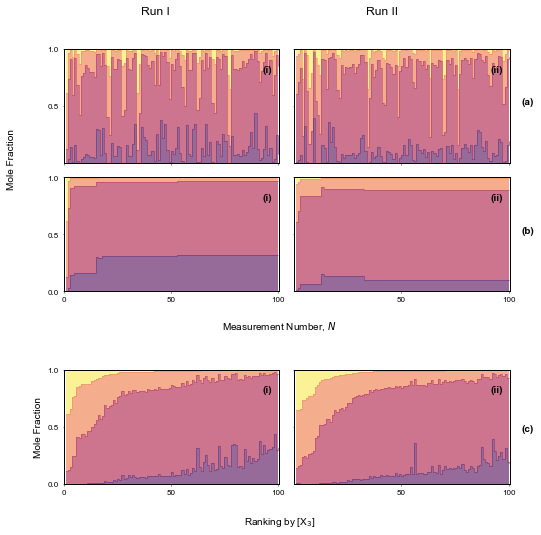

In [11]:
fig = plt.figure(figsize=(8, 8))
grid = GridSpec(14,6)

keys = ['NA', 'MA', 'BA', 'TA']

font = font0.copy()
font.set_weight('bold')

colors = colors
ax1 = plt.subplot(grid[:4,:3])
ax2 = plt.subplot(grid[:4,3:])
ax3 = plt.subplot(grid[4:8,:3])
ax4 = plt.subplot(grid[4:8,3:])
ax5 = plt.subplot(grid[10:,:3])
ax6 = plt.subplot(grid[10:,3:])

best_inds1 = []
best_inds2 = []
for ind in run2_outputs.index.tolist():
    best_inds1.append(run2[run2.f == run2.f.iloc[:ind+1].min()].index.values[0])
    
for ind in run1_outputs.index.tolist():
    best_inds2.append(run1[run1.f == run1.f.iloc[:ind+1].min()].index.values[0])


for i in range(len(colors)-1, -1, -1):
    if i < len(colors) - 1:
        alpha = 0.7
    else:
        alpha = 0.7
    
    y = run2_outputs[keys[i]].tolist()
    bottom = run2_outputs[keys[:i]].sum(axis=1).tolist()
    ax2 = plot_bars(ax2, y, bottom, colors[i], alpha)
    
    y = run1_outputs[keys[i]].tolist()
    bottom = run1_outputs[keys[:i]].sum(axis=1).tolist()
    ax1 = plot_bars(ax1, y, bottom, colors[i], alpha)
    
    y = run2_outputs.sort_values(by='TA', ascending=False)[keys[i]].tolist()
    bottom = run2_outputs.sort_values(by='TA', ascending=False)[keys[:i]].sum(axis=1).tolist()
    ax6 = plot_bars(ax6, y, bottom, colors[i], alpha)

    y = run1_outputs.sort_values(by='TA', ascending=False)[keys[i]].tolist()
    bottom = run1_outputs.sort_values(by='TA', ascending=False)[keys[:i]].sum(axis=1).tolist()
    ax5 = plot_bars(ax5, y, bottom, colors[i], alpha)

    y = run2_outputs[keys[i]].iloc[best_inds1].tolist()
    bottom = run2_outputs[keys[:i]].iloc[best_inds1].sum(axis=1).tolist()
    ax4 = plot_bars(ax4, y, bottom, colors[i], alpha)
    
    y = run1_outputs[keys[i]].iloc[best_inds2].tolist()
    bottom = run1_outputs[keys[:i]].iloc[best_inds2].sum(axis=1).tolist()
    ax3 = plot_bars(ax3, y, bottom, colors[i], alpha)


for i, ax in enumerate((ax1, ax2, ax3, ax4, ax5, ax6)):
    ax.set_xlim(0.5, 100.5)
    ax.set_ylim(0, 1)
    if i in [0,2,4]:
        ax.set_xticks([0, 50, 100])
    else:
        ax.set_xticks([50,100])
    ax.set_yticks([0.5, 1])
    if i % 2:
        text = '(ii)'
    else:
        text = '(i)'
        
    ax.annotate(text, xy=(0.97, 0.8), xycoords='axes fraction', fontsize=10, ha='right', fontproperties=font)

ax3.set_yticks([0, 0.5, 1])
ax5.set_yticks([0, 0.5, 1])
    
ax2.set_xticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])
ax6.set_yticklabels([])

ax5.set_ylabel('Mole Fraction', fontsize=10)
fig.text(0.5, 0.06, 'Ranking by [X$_3$]', va='center', ha='center', fontsize=10)
fig.text(0.5, 0.4, 'Measurement Number, $N$', va='center', ha='center', fontsize=10)
fig.text(0.035, 0.69, 'Mole Fraction', va='center', ha='center', fontsize=10, rotation='vertical')

fig.subplots_adjust(hspace=0.8, wspace=0.25)
fig.text(0.26, 0.94, 'Run I', fontsize=12)
fig.text(0.65, 0.94, 'Run II', fontsize=12)

fig.text(0.92, 0.784, '(a)', fontsize=10, fontweight='bold')
fig.text(0.92, 0.561, '(b)', fontsize=10, fontweight='bold')
fig.text(0.92, 0.216, '(c)', fontsize=10, fontweight='bold')